In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Read the csv file
fca_no_reservation = pd.read_csv('warmup_without_reservation.csv', header=None)
fca_handover_reservation = pd.read_csv('warmup_with_reservation.csv', header=None)

# Set names and constants
fca_no_reservation.columns = ["Blocked Calls Rate", "Dropped Calls Rate"]
fca_handover_reservation.columns = ["Blocked Calls Rate", "Dropped Calls Rate"]
total_calls = 250000
total_runs = 9

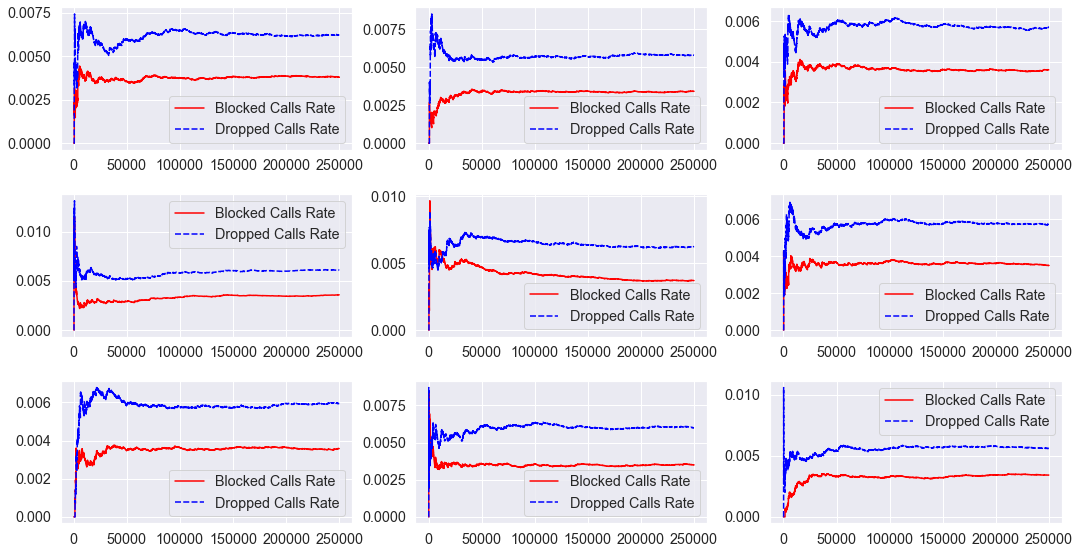

In [8]:
# Set the display
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(15, 8)}, font_scale=1.3)

# Set 9 subplots
fig, axs = plt.subplots(nrows=3, ncols=3)
fig.tight_layout(pad=1.0)

# Plot the statistics for FCA scheme with no reservation
for i in range(total_runs):
    single_run = fca_no_reservation.loc[i*total_calls:(i + 1)*total_calls - 1].reset_index(drop=True)
    sns.lineplot(data=single_run, ax=axs[i//3][(i - i//3)%3], palette=("red","blue"))

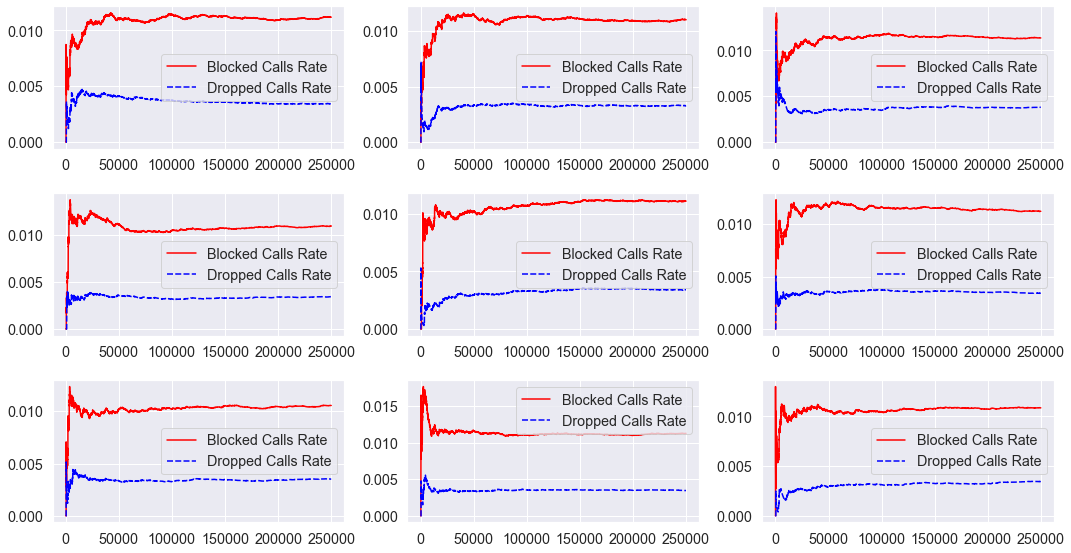

In [9]:
# Set the display
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(15, 8)}, font_scale=1.3)

# Set 9 subplots
fig, axs = plt.subplots(nrows=3, ncols=3)
fig.tight_layout(pad=1.0)

# Plot the statistics for FCA scheme with handover reservation
for i in range(total_runs):
    single_run = fca_handover_reservation.loc[i*total_calls:(i + 1)*total_calls - 1].reset_index(drop=True)
    sns.lineplot(data=single_run, ax=axs[i//3][(i - i//3)%3], palette=("red","blue"))

In [21]:
blocked_calls = []
dropped_calls = []

for i in range(total_calls):
    blocked_calls.append(0)
    dropped_calls.append(0)

for i in range(total_runs):
    blocked_calls = [x + y for x, y in zip(blocked_calls, fca_no_reservation["Blocked Calls Rate"][i*total_calls:(i + 1)*total_calls - 1])]

for i in range(total_runs):
    dropped_calls = [x + y for x, y in zip(dropped_calls, fca_no_reservation["Dropped Calls Rate"][i*total_calls:(i + 1)*total_calls - 1])]

In [22]:
no_reserve = pd.DataFrame.from_dict({"Average Blocked Calls Rate": [x/9 for x in blocked_calls], "Average Dropped Calls Rate": [y/9 for y in dropped_calls]})

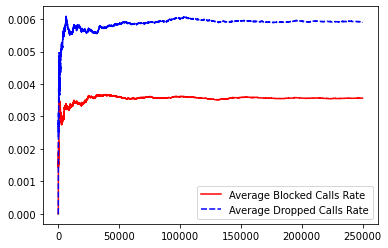

In [23]:
sns.lineplot(data=no_reserve, palette=("red","blue"))

In [26]:
blocked_calls = []
dropped_calls = []

for i in range(total_calls):
    blocked_calls.append(0)
    dropped_calls.append(0)

for i in range(total_runs):
    blocked_calls = [x + y for x, y in zip(blocked_calls, fca_handover_reservation["Blocked Calls Rate"][i*total_calls:(i + 1)*total_calls - 1])]

for i in range(total_runs):
    dropped_calls = [x + y for x, y in zip(dropped_calls, fca_handover_reservation["Dropped Calls Rate"][i*total_calls:(i + 1)*total_calls - 1])]
    
reserve = pd.DataFrame.from_dict({"Average Blocked Calls Rate": [x/9 for x in blocked_calls], "Average Dropped Calls Rate": [y/9 for y in dropped_calls]})

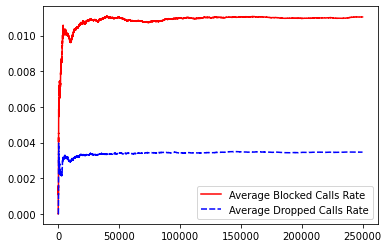

In [27]:
sns.lineplot(data=reserve, palette=("red","blue"))